# Import necessary libraries

In [2]:
!pip install selenium

     ---------------------------------------- 6.3/6.3 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [69]:
import pandas as pd

from bs4 import BeautifulSoup
import requests

import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

import re
import string
from nltk.stem import PorterStemmer

# Web Scraping

### URL : https://www.flipkart.com/apple-iphone-13-pink-128-gb/p/itm6e30c6ee045d2?pid=MOBG6VF5GXVFTQ5Y&lid=LSTMOBG6VF5GXVFTQ5YSGQY4O&marketplace=FLIPKART&q=iphone+13&store=tyy%2F4io&srno=s_1_12&otracker=search&otracker1=search&fm=organic&iid=ba5bc1f0-cf65-4315-ab2f-3564eb24c9e3.MOBG6VF5GXVFTQ5Y.SEARCH&ppt=hp&ppn=homepage&ssid=kuqnfqp5dc0000001671165510798&qH=c68a3b83214bb235

In [29]:
url = 'https://www.flipkart.com/apple-iphone-13-pink-128-gb/product-reviews/itm6e30c6ee045d2?pid=MOBG6VF5GXVFTQ5Y&lid=LSTMOBG6VF5GXVFTQ5YSGQY4O&marketplace=FLIPKART'

In [39]:
url2 = 'https://www.flipkart.com/apple-iphone-13-pink-128-gb/product-reviews/itm6e30c6ee045d2?pid=MOBG6VF5GXVFTQ5Y&lid=LSTMOBG6VF5GXVFTQ5YSGQY4O&marketplace=FLIPKART&page=2'

## Getting the content from webpage

In [40]:
page = requests.get(url)
page2 = requests.get(url2)

In [31]:
page

<Response [200]>

In [41]:
page2

<Response [200]>

In [28]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" 

In [42]:
soup = BeautifulSoup(page.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <li

## Getting Review titles from the webpage

In [43]:
names = soup.find_all('p',class_='_2sc7ZR _2V5EHH')
names2 = soup2.find_all('p',class_='_2sc7ZR _2V5EHH')

In [34]:
names

[<p class="_2sc7ZR _2V5EHH">Mahim Chauhan</p>,
 <p class="_2sc7ZR _2V5EHH">Vaibhav  Raj</p>,
 <p class="_2sc7ZR _2V5EHH">Vishal Dubey</p>,
 <p class="_2sc7ZR _2V5EHH">Maharshi Pandey</p>,
 <p class="_2sc7ZR _2V5EHH">Flipkart Customer</p>,
 <p class="_2sc7ZR _2V5EHH">Pabitra Biswas</p>,
 <p class="_2sc7ZR _2V5EHH">Rajan Khan</p>,
 <p class="_2sc7ZR _2V5EHH">Parwej  Alam</p>,
 <p class="_2sc7ZR _2V5EHH">Satwinder  Singh</p>,
 <p class="_2sc7ZR _2V5EHH">Amit Kumar</p>]

In [44]:
names2

[<p class="_2sc7ZR _2V5EHH">Nithesh Nayak</p>,
 <p class="_2sc7ZR _2V5EHH">Jithu Gopal</p>,
 <p class="_2sc7ZR _2V5EHH">ritu mishra</p>,
 <p class="_2sc7ZR _2V5EHH">Sanoop A K</p>,
 <p class="_2sc7ZR _2V5EHH">Diptanil Debbarma</p>,
 <p class="_2sc7ZR _2V5EHH">Pranjal  Das</p>,
 <p class="_2sc7ZR _2V5EHH">Rithik S</p>,
 <p class="_2sc7ZR _2V5EHH">Santanu Saha</p>,
 <p class="_2sc7ZR _2V5EHH">NURAIN AHMAD</p>,
 <p class="_2sc7ZR _2V5EHH">Saitarun</p>]

In [45]:
cust_name = []
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())
for i in range(0,len(names2)):
    cust_name.append(names2[i].get_text())
cust_name

['Mahim Chauhan',
 'Vaibhav  Raj',
 'Vishal Dubey',
 'Maharshi Pandey',
 'Flipkart Customer',
 'Pabitra Biswas',
 'Rajan Khan',
 'Parwej  Alam',
 'Satwinder  Singh',
 'Amit Kumar',
 'Nithesh Nayak',
 'Jithu Gopal',
 'ritu mishra',
 'Sanoop A K',
 'Diptanil Debbarma',
 'Pranjal  Das',
 'Rithik S',
 'Santanu Saha',
 'NURAIN AHMAD',
 'Saitarun']

In [46]:
len(cust_name)

20

## Getting Review titles from the webpage

In [49]:
rev_title = soup.find_all('p', class_ = '_2-N8zT')
rev_title2 = soup2.find_all('p', class_ = '_2-N8zT')
rev_title2

[<p class="_2-N8zT">Must buy!</p>,
 <p class="_2-N8zT">Just wow!</p>,
 <p class="_2-N8zT">Terrific purchase</p>,
 <p class="_2-N8zT">Classy product</p>,
 <p class="_2-N8zT">Classy product</p>,
 <p class="_2-N8zT">Fabulous!</p>,
 <p class="_2-N8zT">Excellent</p>,
 <p class="_2-N8zT">Terrific purchase</p>,
 <p class="_2-N8zT">Great product</p>,
 <p class="_2-N8zT">Awesome</p>]

In [51]:
cust_rev_title = []
for i in range(0,len(rev_title)):
    cust_rev_title.append(rev_title[i].get_text())

for i in range(0,len(rev_title2)):
    cust_rev_title.append(rev_title2[i].get_text())
    
cust_rev_title

['Brilliant',
 'Fabulous!',
 'Must buy!',
 'Fabulous!',
 'Perfect product!',
 'Worth every penny',
 'Simply awesome',
 'Must buy!',
 'Brilliant',
 'Worth every penny',
 'Must buy!',
 'Just wow!',
 'Terrific purchase',
 'Classy product',
 'Classy product',
 'Fabulous!',
 'Excellent',
 'Terrific purchase',
 'Great product',
 'Awesome']

## Getting Review content from the webpage

In [57]:
rev_content = soup.find_all('div',class_='t-ZTKy')
rev_content2 = soup2.find_all('div',class_='t-ZTKy')
rev_content

[<div class="t-ZTKy"><div><div class="">I switch to ios from android after 10 years so this review might help for migrators<br/><br/>It’s been a month using the iPhone13 and this was my experience<br/><br/>1. Design - its simple and no nonsense design . Expect white and pink rest of the colours are fingerprint magnets.  I have seen all the colours and I highly recommend the pink . It’s so light pink which makes it not girlish. See it for yourself it really looks so premium in light pink colour. <br/><br/>For rest of it except white the aluminium frame wil...</div><span class="_1BWGvX"><span>READ MORE</span></span></div></div>,
 <div class="t-ZTKy"><div><div class="">Amazing beast....<br/>As expected , didn't disappoint me,<br/>Had to sell hard chunk of kidneys to get it !!;p<br/>Camera quality is definitely a super upgrade<br/>Battery is super.. easily last throughout the day with heavy usage.<br/>Light weight looks stylish what else you need??<br/>Starlight color just wow!!!<br/>Apple

In [58]:
cust_rev_cont = []

for i in range(0,len(rev_content)):
    cust_rev_cont.append(rev_content[i].get_text())

for i in range(0,len(rev_content2)):
    cust_rev_cont.append(rev_content2[i].get_text())

In [63]:
cust_rev_cont[0]

'I switch to ios from android after 10 years so this review might help for migratorsIt’s been a month using the iPhone13 and this was my experience1. Design - its simple and no nonsense design . Expect white and pink rest of the colours are fingerprint magnets.  I have seen all the colours and I highly recommend the pink . It’s so light pink which makes it not girlish. See it for yourself it really looks so premium in light pink colour. For rest of it except white the aluminium frame wil...READ MORE'

## Creating Dataframe using the data collected

In [64]:
cust_reiew = pd.DataFrame(list(zip(cust_name, cust_rev_title, cust_rev_cont)),
               columns =['Name', 'Title','Review'])
cust_reiew

,Name,Title,Review
0,Mahim Chauhan,Brilliant,I switch to ios from android after 10 years so...
1,Vaibhav Raj,Fabulous!,"Amazing beast....As expected , didn't disappoi..."
2,Vishal Dubey,Must buy!,Just upgraded from 11 to iPhone 13 ..cinematic...
3,Maharshi Pandey,Fabulous!,Picture quality is amazing you do not need to ...
4,Flipkart Customer,Perfect product!,Awesome camera Amazing battery life Super xdr ...
5,Pabitra Biswas,Worth every penny,Day 2 Review: Display shows great color. Perfo...
6,Rajan Khan,Simply awesome,Just love it ❤️Camera is good Night mode is ki...
7,Parwej Alam,Must buy!,Performance very good Display very good Batter...
8,Satwinder Singh,Brilliant,Very impressed with this order.. i phone 13 be...
9,Amit Kumar,Worth every penny,Just shifted from Android to iOS .. The new ip...


# Data Preprocessing

### Data Cleaning

In [72]:
corpus = []
ps=PorterStemmer()
for i in range(0,20):
    review = re.sub('[^a-zA-Z]',' ', cust_reiew['Review'][i]) #Removal of special characters
    review = review.lower() 
    review = review.split() #Tokenization
    review = [ps.stem(word) for word in review] #Stemming
    review = ' '.join(review)
    review = review.translate(str.maketrans('','',string.punctuation)) #Removal of punctuations
    corpus.append(review)

In [73]:
corpus

['i switch to io from android after year so thi review might help for migratorsit s been a month use the iphon and thi wa my experi design it simpl and no nonsens design expect white and pink rest of the colour are fingerprint magnet i have seen all the colour and i highli recommend the pink it s so light pink which make it not girlish see it for yourself it realli look so premium in light pink colour for rest of it except white the aluminium frame wil read more',
 'amaz beast as expect didn t disappoint me had to sell hard chunk of kidney to get it pcamera qualiti is definit a super upgradebatteri is super easili last throughout the day with heavi usag light weight look stylish what els you need starlight color just wow appl it would have been better if you should have given an adaptor increas k price and give it in box simpl edit after day of usag highli satisfi with batteri perform last thr read more',
 'just upgrad from to iphon cinemat mode video awesom camera awesom display aweso

In [76]:
df = pd.DataFrame(corpus, columns=['Review'])

In [77]:
df

,Review
0,i switch to io from android after year so thi ...
1,amaz beast as expect didn t disappoint me had ...
2,just upgrad from to iphon cinemat mode video a...
3,pictur qualiti is amaz you do not need to thin...
4,awesom camera amaz batteri life super xdr disp...
5,day review display show great color perform wa...
6,just love it camera is good night mode is kill...
7,perform veri good display veri good batteri go...
8,veri impress with thi order i phone best in cl...
9,just shift from android to io the new iphon is...


### Assigning affinity values of -1 for all the negative words

In [78]:
afinn_n = pd.read_csv("negative-words.txt",sep=';', encoding='latin-1',header=None)
afinn_n=afinn_n.iloc[:,0]
afinn_n.dropna(inplace=True)
afinn_n=afinn_n.reset_index()
afinn_n['value']=-1
afinn_n.drop(['index'],axis=1,inplace=True)
afinn_n.columns=['words','value']
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


### Assigning affinity values of 1 for all the positive words

In [80]:
afinn_p = pd.read_csv("positive-words.txt",sep=';', encoding='latin-1',header=None)
afinn_p=afinn_p.iloc[:,0]
afinn_p.dropna(inplace=True)
afinn_p=afinn_p.reset_index()
afinn_p['value']=1
afinn_p.drop(['index'],axis=1,inplace=True)
afinn_p.columns=['words','value']
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


### Concatinating the dataframes to get an affinity dataframe

In [81]:
afinn=pd.concat([afinn_n,afinn_p],ignore_index=True)
afinn.head()

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1


In [82]:
affinity_scores = afinn.set_index('words')['value'].to_dict()

# Emotion Mining

In [83]:
import spacy

In [93]:
# !pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [87]:
! pip install spacy
! python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 120.0 kB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [88]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [90]:
sent_df=df.copy()
sent_df.columns=["sentence"]

In [91]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [92]:
sent_df

,sentence,sentiment_value
0,i switch to io from android after year so thi ...,1
1,amaz beast as expect didn t disappoint me had ...,3
2,just upgrad from to iphon cinemat mode video a...,1
3,pictur qualiti is amaz you do not need to thin...,4
4,awesom camera amaz batteri life super xdr disp...,3
5,day review display show great color perform wa...,2
6,just love it camera is good night mode is kill...,3
7,perform veri good display veri good batteri go...,3
8,veri impress with thi order i phone best in cl...,3
9,just shift from android to io the new iphon is...,4


### Finding the word count of sentences

In [94]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,i switch to io from android after year so thi ...,1,92
1,amaz beast as expect didn t disappoint me had ...,3,83
2,just upgrad from to iphon cinemat mode video a...,1,27
3,pictur qualiti is amaz you do not need to thin...,4,74
4,awesom camera amaz batteri life super xdr disp...,3,29
5,day review display show great color perform wa...,2,27
6,just love it camera is good night mode is kill...,3,35
7,perform veri good display veri good batteri go...,3,12
8,veri impress with thi order i phone best in cl...,3,22
9,just shift from android to io the new iphon is...,4,46


In [95]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
14,the most premium feel i ever had while hold a ...,0,70
0,i switch to io from android after year so thi ...,1,92
2,just upgrad from to iphon cinemat mode video a...,1,27
12,it s just mind blow i have switch from android...,1,56
5,day review display show great color perform wa...,2,27
16,it s a new iphon it s faster than the last one...,2,107
1,amaz beast as expect didn t disappoint me had ...,3,83
4,awesom camera amaz batteri life super xdr disp...,3,29
6,just love it camera is good night mode is kill...,3,35
7,perform veri good display veri good batteri go...,3,12


In [96]:
sent_df['sentiment_value'].describe()

count    20.000000
mean      2.900000
std       1.333772
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: sentiment_value, dtype: float64

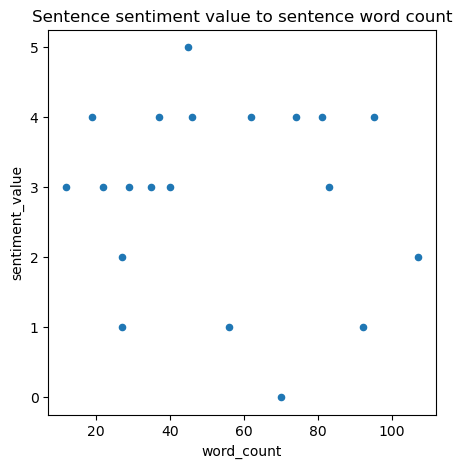

In [99]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(5,5), 
                     title='Sentence sentiment value to sentence word count')
plt.show()

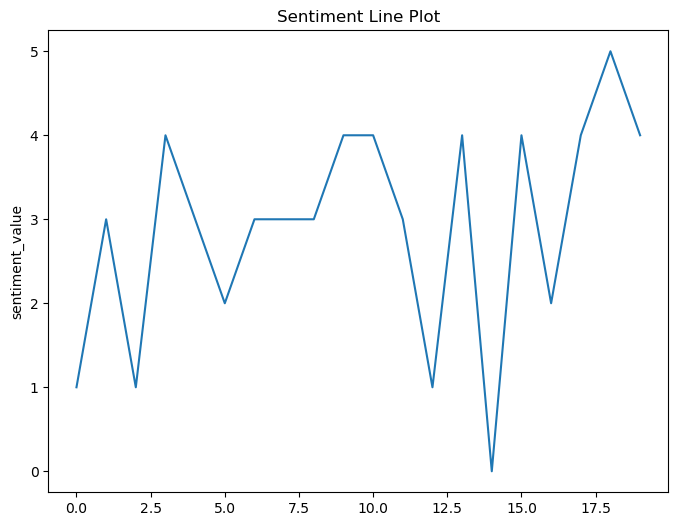

In [102]:
plt.figure(figsize = (8,6))
sns.lineplot(y ='sentiment_value',x=range(20),data = sent_df)
plt.title('Sentiment Line Plot')
plt.show()